In [127]:
import pandas_datareader.data as pdr
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np

In [128]:
ticker = ["DABUR.NS","DLF.NS","DIVISLAB.NS"]
start_date = dt.datetime(2015,1,1)
end_date = dt.datetime(2020,1,1)
print(len(ticker))

3


In [129]:
data = pdr.get_data_yahoo(ticker,start_date,end_date,interval='d')

In [130]:
adj_close_data = data["Adj Close"]
adj_close_data.head()
type(adj_close_data)

pandas.core.frame.DataFrame

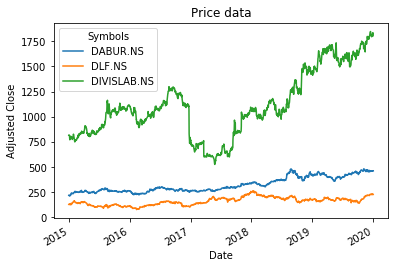

In [131]:
adj_close_data.plot()
plt.xlabel("Date")
plt.ylabel("Adjusted Close")
plt.title("Price data")
plt.show()

In [132]:
av_adj_close_data = adj_close_data.resample('M').ffill().pct_change()
av_adj_close_data.head()
mean = av_adj_close_data.mean()
std = av_adj_close_data.std()
annualized_return = mean*12*100
annualized_std = std*math.sqrt(12)*100
print(annualized_return)
print(annualized_std)

Symbols
DABUR.NS       14.715366
DLF.NS         15.634261
DIVISLAB.NS    21.271475
dtype: float64
Symbols
DABUR.NS       18.772223
DLF.NS         42.009756
DIVISLAB.NS    31.821382
dtype: float64


In [133]:
corr_table = adj_close_data.corr()
print(corr_table)

Symbols      DABUR.NS    DLF.NS  DIVISLAB.NS
Symbols                                     
DABUR.NS     1.000000  0.612621     0.795694
DLF.NS       0.612621  1.000000     0.265871
DIVISLAB.NS  0.795694  0.265871     1.000000


In [134]:
cov_table = adj_close_data.cov()
print(cov_table)

Symbols          DABUR.NS       DLF.NS    DIVISLAB.NS
Symbols                                              
DABUR.NS      5322.845666  1755.575018   18819.469462
DLF.NS        1755.575018  1542.804286    3385.441076
DIVISLAB.NS  18819.469462  3385.441076  105094.196834


In [135]:
np.random.seed(42)
num_ports = 6000
all_weights = np.zeros((num_ports, len(ticker)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for x in range(num_ports):
    # Weights
    weights = np.array(np.random.random(len(ticker)))
    weights = weights/np.sum(weights)
    
    # Save weights
    all_weights[x,:] = weights
    
    # Expected return
    ret_arr[x] = np.sum( (annualized_return * weights ))
    
    # Expected volatility
    vol_arr[x] = np.sqrt(np.dot(weights.T, np.dot(cov_table, weights)))
    
    # Sharpe Ratio
    sharpe_arr[x] = ret_arr[x]/vol_arr[x]

In [136]:
max_sr_ret = ret_arr[sharpe_arr.argmax()]
max_sr_vol = vol_arr[sharpe_arr.argmax()]

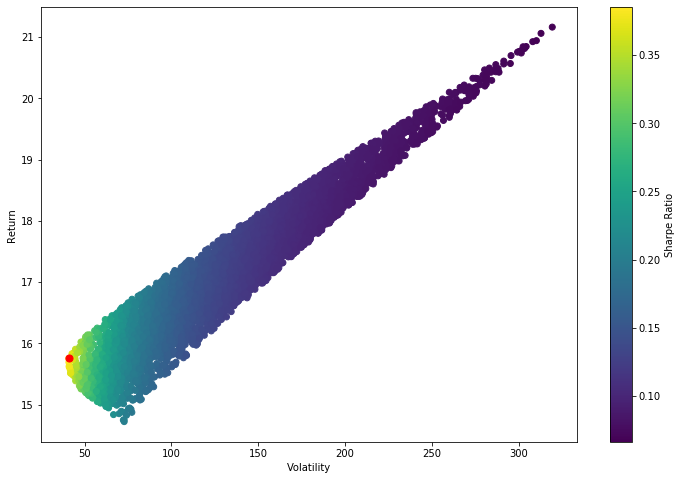

In [137]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.scatter(max_sr_vol, max_sr_ret,c='red', s=50) # red dot
plt.show()